In [2]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

**Loading Data**

In [ ]:
train_set = image_dataset_from_directory(directory="./New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_set = image_dataset_from_directory(directory="./New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256)) #resize the images to 256x256 pixels.

rescale = Rescaling(scale=1.0/255) #normalisation
train = train_set.map(lambda image,label:(rescale(image),label))
test  = test_set.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
# Extract class names from the original dataset
class_names = train_set.class_names
print("Class names:", class_names)
print("Number of classes:", len(class_names))


Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

In [ ]:
#Inspecting data structure
for images, labels in train.take(1):  # Take one batch
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
#Images shape: (32, 256, 256, 3): 32 images of size 256x256 with 3 color channels

Images shape: (32, 256, 256, 3)
Labels shape: (32,)


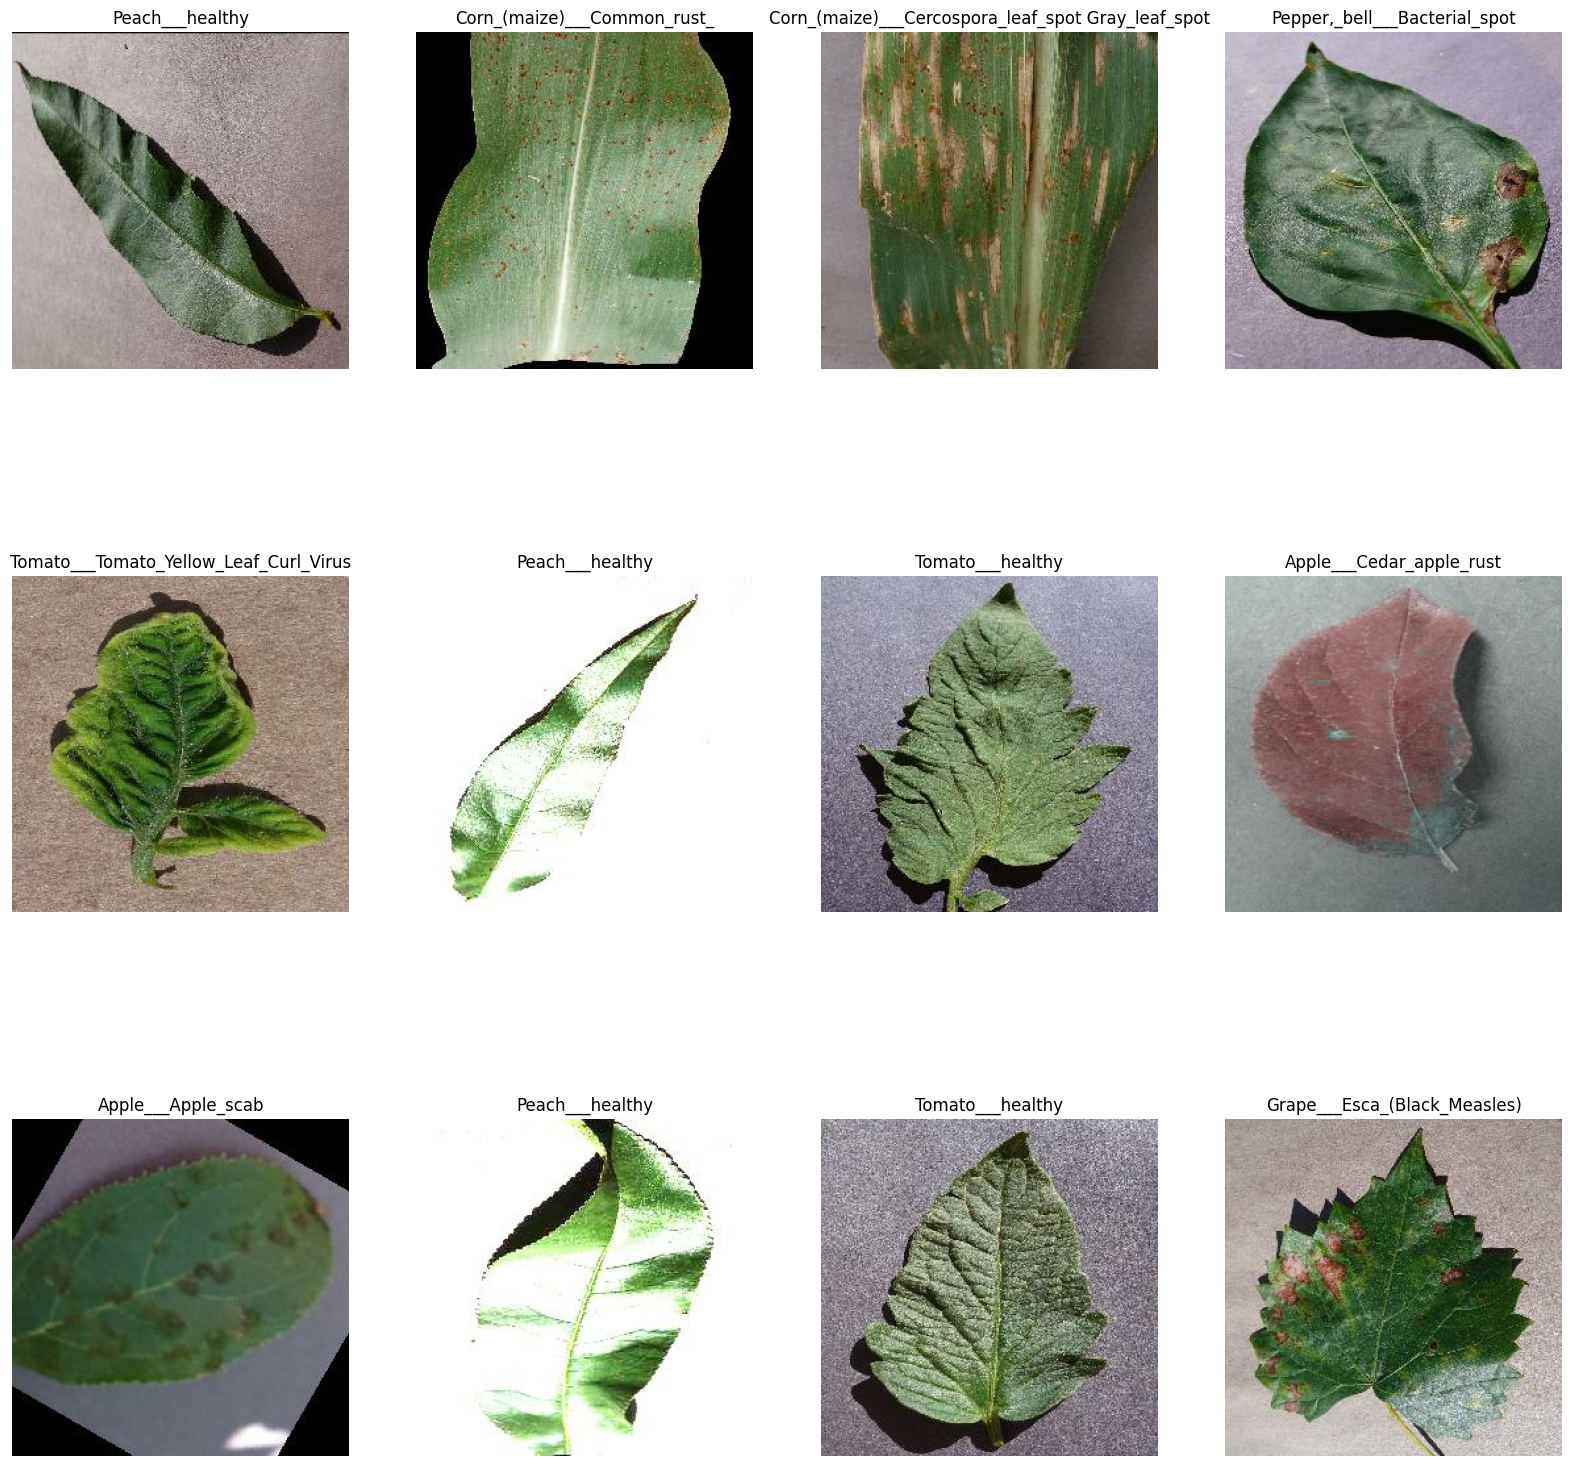

In [ ]:
#Displaying some images
# Plot a batch of images
plt.figure(figsize=(20, 20))
for images, labels in train_set.take(1):  # Take one batch
    for i in range(12):  # Display 9 images
        ax = plt.subplot(3, 4, i + 1)  #create a subplot within a figure.
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to numpy array
        plt.title(class_names[labels[i].numpy()])  # Use the label index to get class name
        plt.axis("off")

Cherry_(including_sour)___Powdery_mildew: 1683
Tomato___Tomato_mosaic_virus: 1790
Corn_(maize)___healthy: 1859
Potato___Late_blight: 1939
Cherry_(including_sour)___healthy: 1826
Tomato___Target_Spot: 1827
Corn_(maize)___Common_rust_: 1907
Pepper,_bell___Bacterial_spot: 1913
Grape___Esca_(Black_Measles): 1920
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642
Strawberry___healthy: 1824
Pepper,_bell___healthy: 1988
Peach___Bacterial_spot: 1838
Soybean___healthy: 2022
Grape___Black_rot: 1888
Grape___healthy: 1692
Blueberry___healthy: 1816
Apple___Black_rot: 1987
Peach___healthy: 1728
Apple___Cedar_apple_rust: 1760
Raspberry___healthy: 1781
Tomato___Leaf_Mold: 1882
Tomato___healthy: 1926
Orange___Haunglongbing_(Citrus_greening): 2010
Corn_(maize)___Northern_Leaf_Blight: 1908
Squash___Powdery_mildew: 1736
Apple___Apple_scab: 2016
Tomato___Septoria_leaf_spot: 1745
Potato___healthy: 1824
Apple___healthy: 2008
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961
Tomato___Early_blight: 1920
Straw

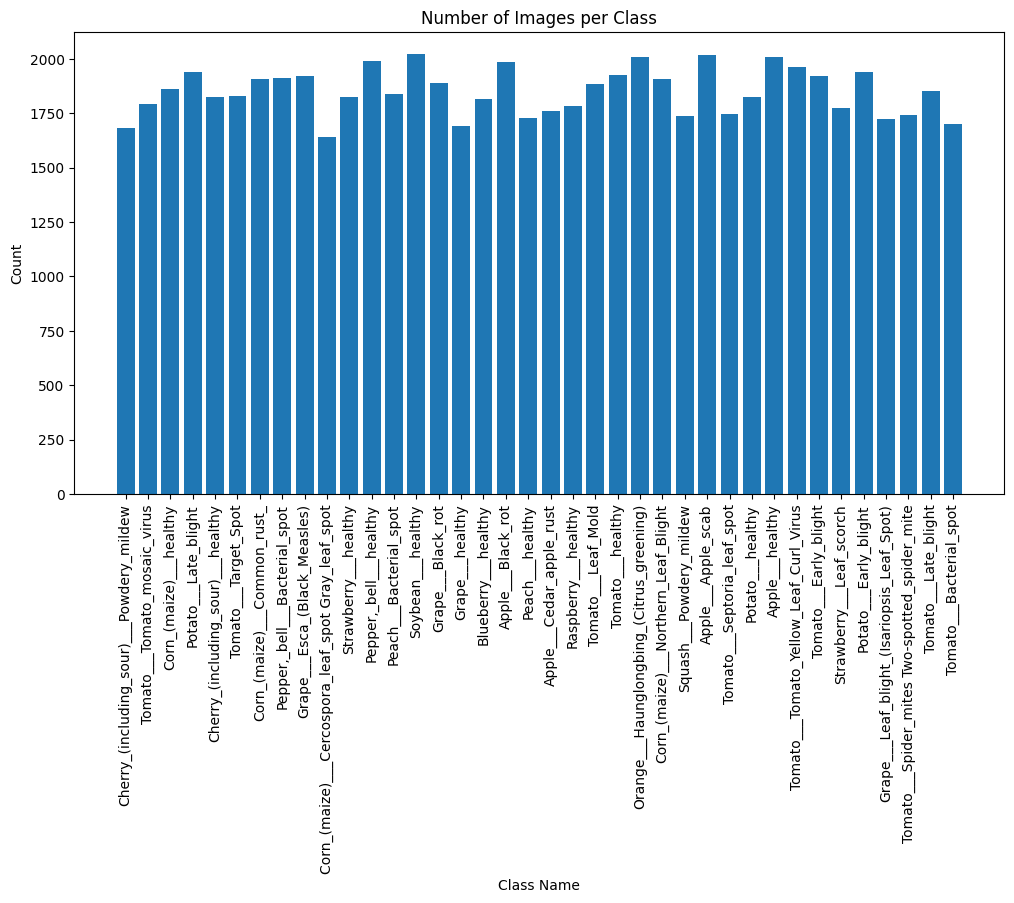

In [ ]:
# Data distribution
# Count occurrences of each class in the training set
class_counts = Counter()
for _, labels in train_set.unbatch():  # Unbatch the dataset for individual images/labels
    class_counts[class_names[labels.numpy()]] += 1 #labels.numpy() returns the index of a label in class_names

# Print the distribution
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Visualize the distribution as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.ylabel("Count")
plt.xlabel("Class Name")
plt.show()

In [7]:
# Dataset properties
print("Training dataset size:", len(train))
print("Testing dataset size:", len(test))

Training dataset size: 2197
Testing dataset size: 550


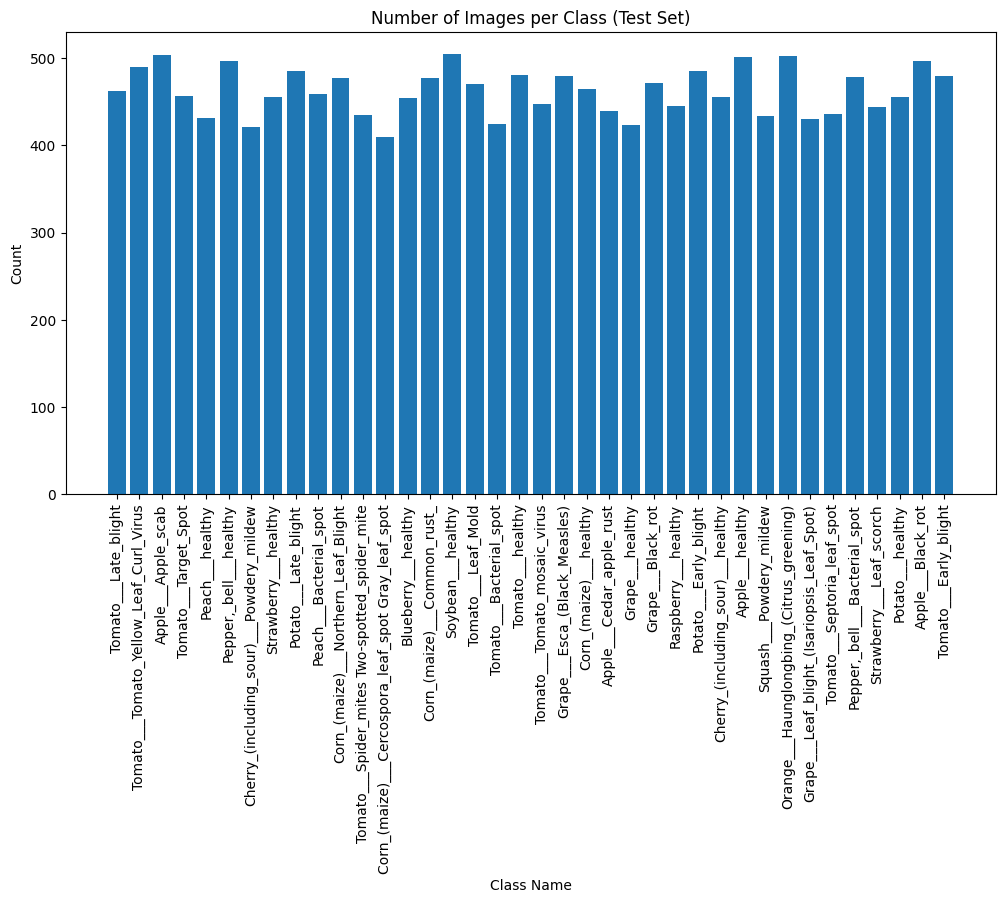

In [8]:
# Class distribution in test set
test_class_counts = Counter()
for _, labels in test.unbatch():
    test_class_counts[class_names[labels.numpy()]] += 1

plt.figure(figsize=(12, 6))
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.xticks(rotation=90)
plt.title("Number of Images per Class (Test Set)")
plt.ylabel("Count")
plt.xlabel("Class Name")
plt.show()

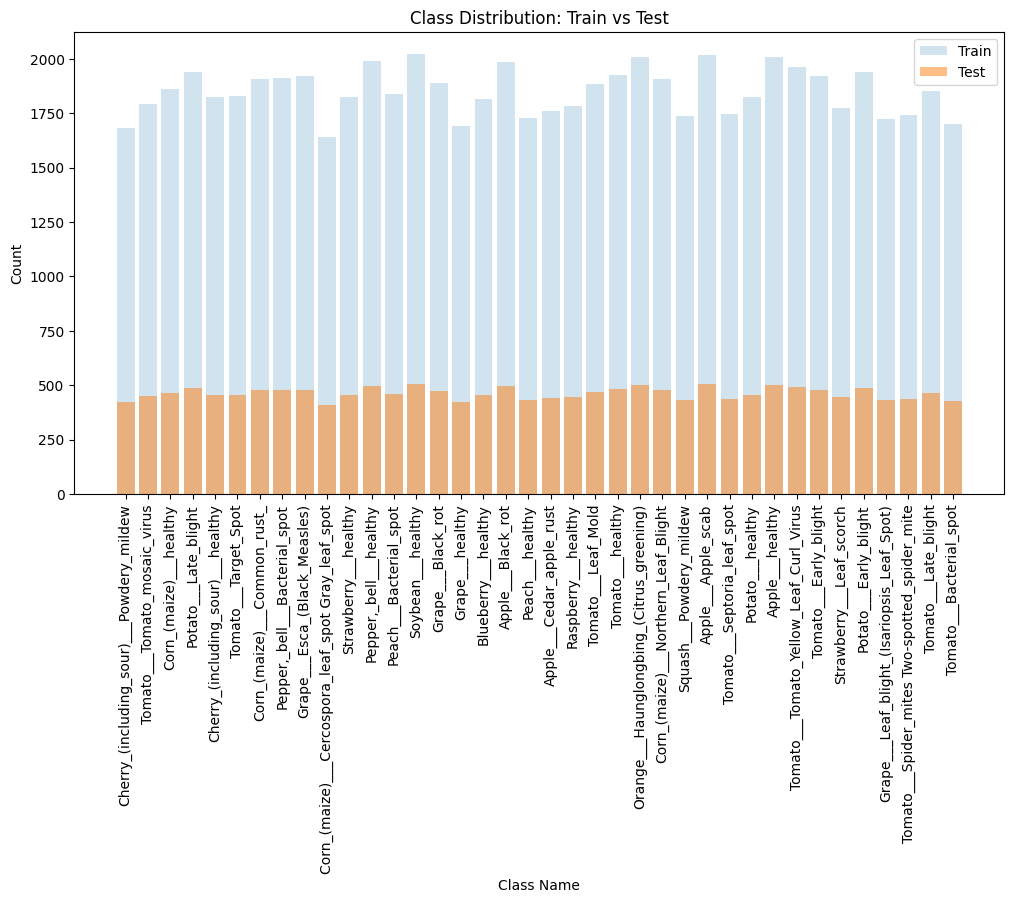

In [19]:
# Checking class imbalance
# Ensure that class_counts is defined by executing the cell that defines it
if 'class_counts' not in globals():
	class_counts = Counter()
	for _, labels in train_set.unbatch():
		class_counts[class_names[labels.numpy()]] += 1

plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), alpha=0.2, label="Train")
plt.bar(test_class_counts.keys(), test_class_counts.values(), alpha=0.5, label="Test")
plt.xticks(rotation=90)
plt.title("Class Distribution: Train vs Test")
plt.ylabel("Count")
plt.xlabel("Class Name")
plt.legend()
plt.show()

In [10]:
# Checking for missing or corrupted images
for images, labels in train:
    try:
        tf.debugging.assert_all_finite(images, "Image contains NaN or Inf")
    except:
        print("Corrupted image found")